In [6]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.impute import SimpleImputer

In [8]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

In [9]:
df.shape

(5000, 14)

In [10]:
df.isnull().values.any() 

False

In [11]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


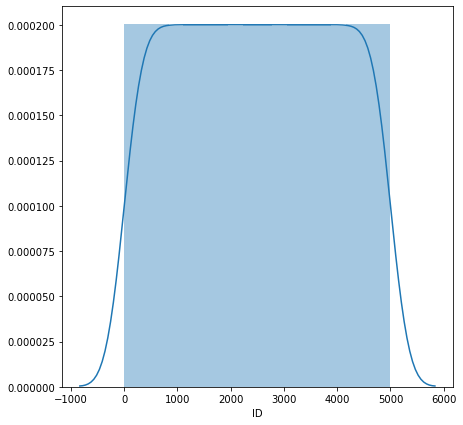

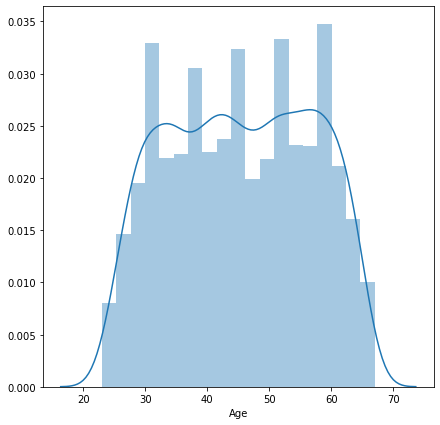

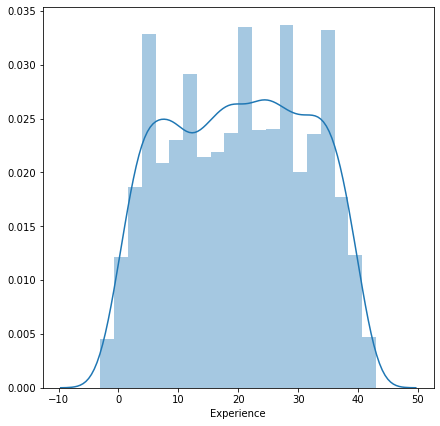

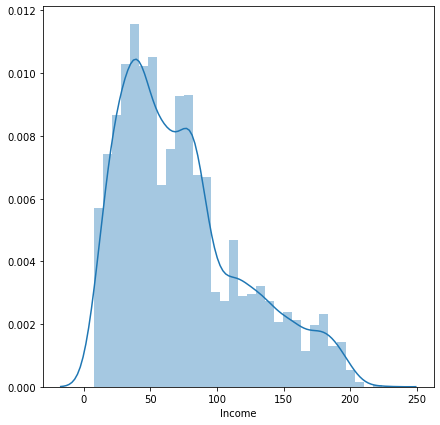

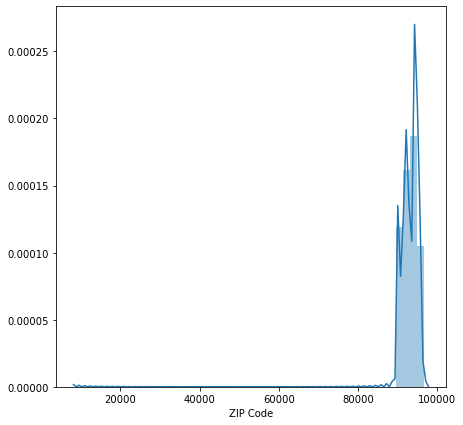

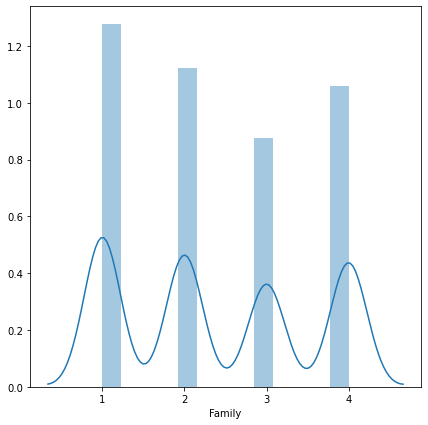

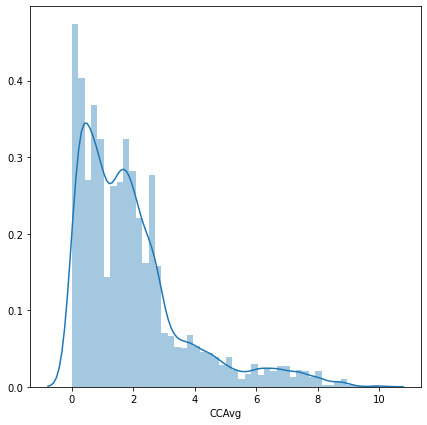

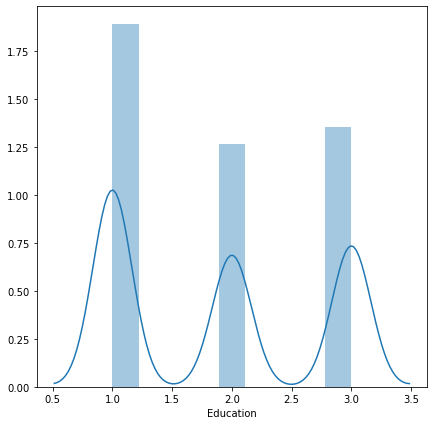

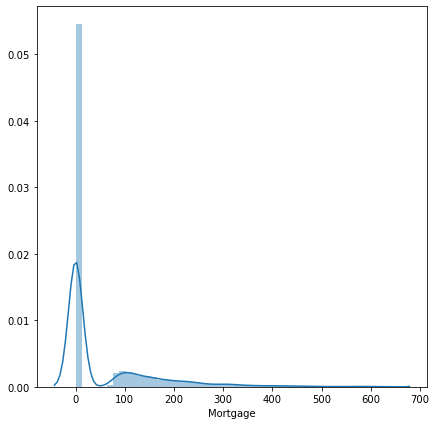

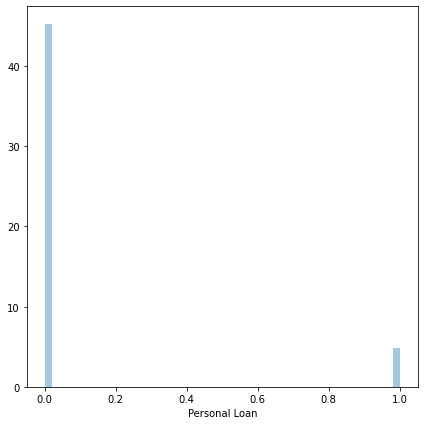

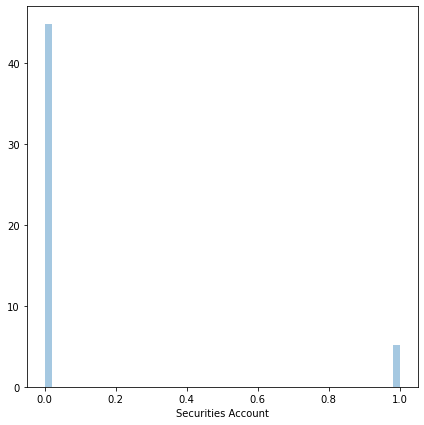

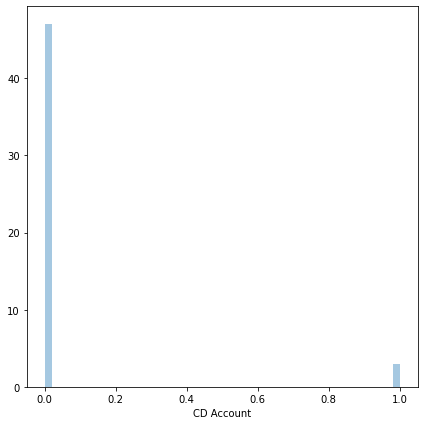

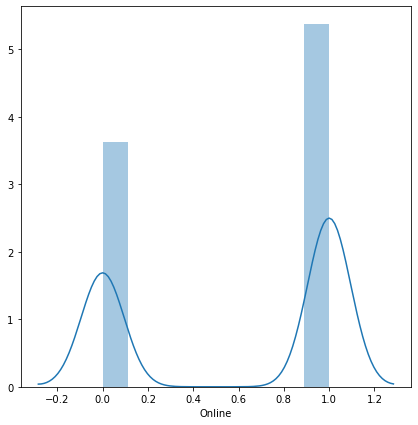

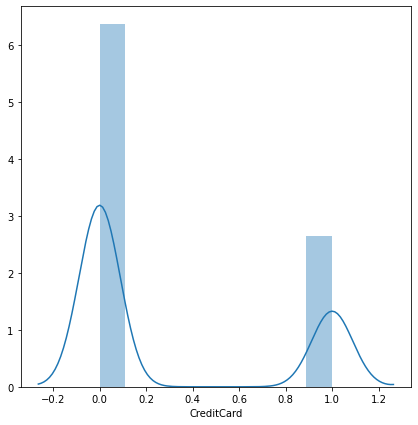

In [14]:
# Univariate

for i in df.columns:
    plt.figure(figsize = (7,7))
    sns.distplot(df[i])
    plt.show()

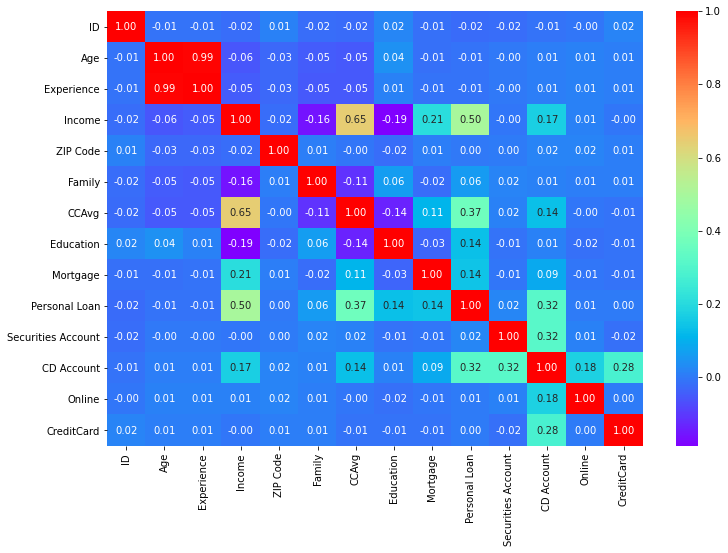

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [18]:
# No of unique in each column

for i in df.columns:
    print("unique_value in",str(i),"column =", df[str(i)].nunique()) 
  

unique_value in ID column = 5000
unique_value in Age column = 45
unique_value in Experience column = 47
unique_value in Income column = 162
unique_value in ZIP Code column = 467
unique_value in Family column = 4
unique_value in CCAvg column = 108
unique_value in Education column = 3
unique_value in Mortgage column = 347
unique_value in Personal Loan column = 2
unique_value in Securities Account column = 2
unique_value in CD Account column = 2
unique_value in Online column = 2
unique_value in CreditCard column = 2


In [19]:
# No of people with zero mortgage

count=0
for i in df["Mortgage"]:
    if i==0:
        count+=1
print(count)
  

3462


In [20]:
# No of people with zero credit card spending per month

count2=0
for i in df["CreditCard"]:
    if i==0:
        count2+=1
print(count2)

3530


In [23]:
# Value counts of all categorical columns

#df.apply(pd.Series.value_counts)



In [31]:
print("Column name is 'Personal Loan'and its value count is:",df["Personal Loan"].value_counts())
print()
print("Column name is 'Securities Account'and its value count is:",df["Securities Account"].value_counts())
print()
print("Column name is 'Online'and its value count is:",df["Online"].value_counts())
print()
print("Column name is 'CreditCard'and its value count is:",df["CreditCard"].value_counts())
print()




Column name is 'Personal Loan'and its value count is: 0    4520
1     480
Name: Personal Loan, dtype: int64

Column name is 'Securities Account'and its value count is: 0    4478
1     522
Name: Securities Account, dtype: int64

Column name is 'Online'and its value count is: 1    2984
0    2016
Name: Online, dtype: int64

Column name is 'CreditCard'and its value count is: 0    3530
1    1470
Name: CreditCard, dtype: int64



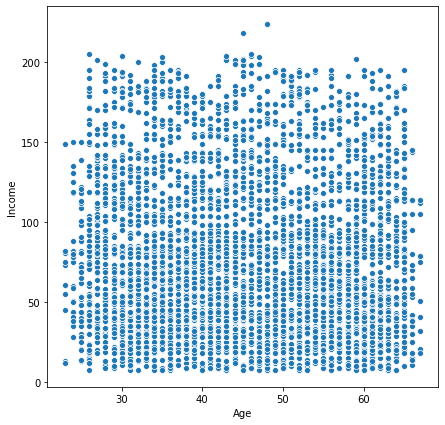

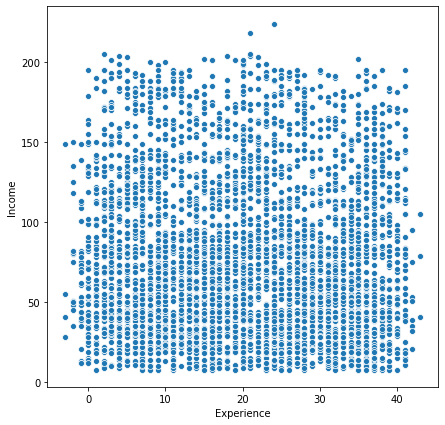

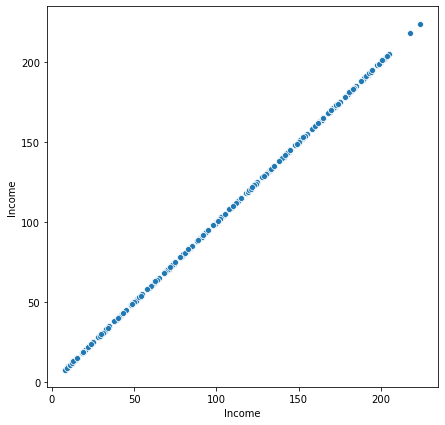

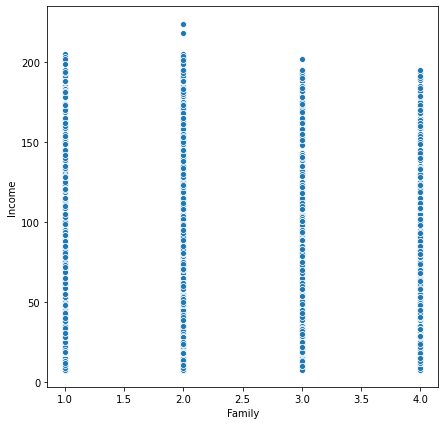

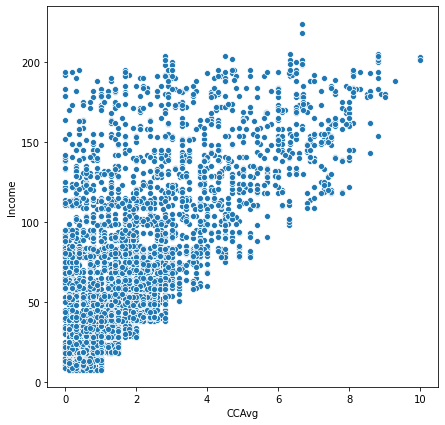

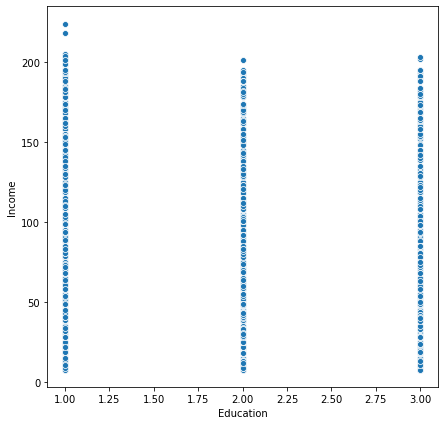

In [38]:
# Bivariate scatterplot against Income

continuos=["Age","Experience","Income","Family","CCAvg","Education"]

for i in continuos:
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = df[i], y = df['Income'])
    plt.show()                

In [42]:
# Splitting the data into training and test set

# Method 1
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [44]:
train_set.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4966,41,34,91361,1,0.7,1,143,0,0,0,0
4086,50,11,93106,4,0.2,1,0,1,0,0,0
2881,49,55,92103,4,0.1,3,0,0,0,1,0
1237,38,169,92093,1,6.8,3,0,0,1,1,1
1429,31,35,95064,1,0.6,3,171,0,0,0,0
2530,56,31,90024,4,1.5,3,0,0,0,1,0
2937,62,89,94022,2,2.0,1,0,0,0,1,1
283,61,40,90029,3,0.5,2,0,1,0,1,0
966,57,44,91605,2,1.6,3,0,0,0,0,0
4847,37,65,94143,2,2.4,2,260,0,0,1,0


In [47]:
#Method 2

X = df.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [50]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.000036 -0.00058 -0.001399  0.036103 -0.000065  0.008596  0.005785   

          7        8         9        10        11        12  intercept  
0  0.009346  0.00086  0.000303  0.002693 -0.000092 -0.000031   -0.00006  


In [51]:
model_score = model.score(x_test, y_test)
print(model_score)

0.908


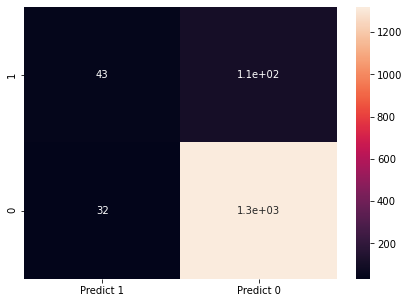

In [53]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

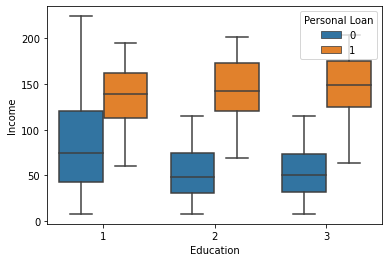

In [55]:
# some additional analysis to get more insights about model performance

sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

####  X axis is education and y axis is income.Customers with more education and more income are more likely to take personal. Customers with better education but less income and customers with less education but more income ar both less likely while customers with both less education and less income are least likely to take personal loans.

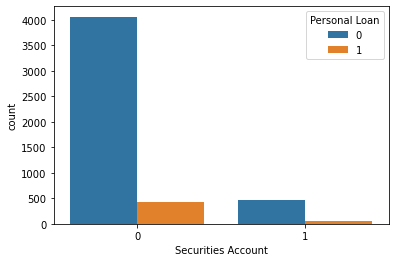

In [59]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

####  The x axis is securities account. Most people who do not have securities account also do not have personal loan.

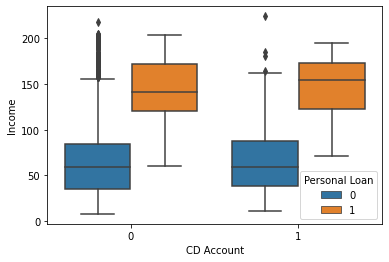

In [61]:
sns.boxplot(x='CD Account',y='Income',hue='Personal Loan',data=df)

####  X Axis is CD Account and Y axis is Income. Customers with more education who also have CD Accounts are also more likely to take personal loans, and vice versa.


#### The model seems to be predicting results quite nicely.

### Understanding

####  Personal Loan buying seems to be greatly affected by income, education and age more than other categories. Other factors like mortgage, securities account, CD account are just results that are borne from the same factors that influence likelihood of buying loans. 

